# **CM2121 - Automatizando o Excel com Python e OpenPyXL**
# **Prof. Dr. Vitor Alex Oliveira Alves**
# **1° Encontro - Revisão de Pandas**

## **Dataset: Wine Quality**

O `Wine Quality Dataset` é bastante utilizado em aprendizado de máquina e estatística, especialmente em problemas de classificação e regressão.

Esse conjunto de dados contém informações físico-químicas de vinhos portugueses (da região do Vinho Verde). Existem duas versões de vinho:

* Vinho tinto (red wine)

* Vinho branco (white wine)

Cada registro representa uma amostra de vinho, caracterizada por variáveis físico-químicas e uma avaliação sensorial de qualidade.

* Variáveis de entrada (11 atributos físico-químicos):

  * `fixed acidity` – acidez fixa

  * `volatile acidity` – acidez volátil

  * `citric acid` – ácido cítrico

  * `residual sugar` – açúcar residual

  * `chlorides` – cloretos

  * `free sulfur dioxide` – dióxido de enxofre livre

  * `total sulfur dioxide` – dióxido de enxofre total

  * `density` – densidade

  * `pH` – pH (grau de acidez do vinho)

  * `sulphates` – sulfatos

  * `alcohol` – teor alcoólico

  * `quality` – nota de qualidade do vinho (inteiro de 0 a 10), avaliada por provadores.

## 0. Importação dos dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

#Criação do DataFrame
df = pd.read_csv(url, sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 1. Exploração inicial do dataset

In [3]:
#Explorando o DataFrame
df.shape
df.columns
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## 2. Leitura e gravação de arquivos CSV

In [4]:
#Criar um arquivo csv com os dados
df.to_csv('vinhos.csv', index=False)
df2 = pd.read_csv('vinhos.csv')
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 3. Criação de novas colunas

In [20]:
df['quality_cat'] = df['quality'].apply(lambda x: 'Bom' if x>=6 else 'Ruim')
df['sugar_norm'] = (df['residual sugar'] - df['residual sugar'].mean()) / df['residual sugar'].std()
df['ph_cat'] = df['pH'].apply(lambda x: 'Acido' if x<6 else 'Pouco Ácido')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualidade_cat,sugar_norm,ph_cat,quality_cat
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Ruim,-0.453077,Acido,Ruim
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Ruim,0.043403,Acido,Ruim
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Ruim,-0.169374,Acido,Ruim
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Bom,-0.453077,Acido,Bom
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Ruim,-0.453077,Acido,Ruim


## 4. Filtros de dados

In [21]:
#Filtrar os vinhos com nota >= 7
#nome_do_datafram[condição]
df[df['quality'] >= 7]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualidade_cat,sugar_norm,ph_cat,quality_cat
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,7,Bom,-0.949556,Acido,Bom
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50,7,Bom,-0.382151,Acido,Bom
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.50,7,Bom,-0.524002,Acido,Bom
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.70,7,Bom,-0.311225,Acido,Bom
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.50,7,Bom,-0.453077,Acido,Bom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90,7,Bom,-0.240300,Acido,Bom
1544,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,7,Bom,-0.169374,Acido,Bom
1549,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40,8,Bom,-0.524002,Acido,Bom
1555,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,7,Bom,-0.594928,Acido,Bom


In [22]:
# Filtrar os vinhos com teor de álcool < 10 e com acidez volátil < 0.5
df[(df['alcohol'] < 10) & (df['volatile acidity'] < 0.5)]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualidade_cat,sugar_norm,ph_cat,quality_cat
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Bom,-0.453077,Acido,Bom
19,7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6,Bom,-0.524002,Acido,Bom
20,8.9,0.22,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4,6,Bom,-0.524002,Acido,Bom
21,7.6,0.39,0.31,2.3,0.082,23.0,71.0,0.99820,3.52,0.65,9.7,5,Ruim,-0.169374,Acido,Ruim
22,7.9,0.43,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5,Ruim,-0.665853,Acido,Ruim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,6.7,0.48,0.08,2.1,0.064,18.0,34.0,0.99552,3.33,0.64,9.7,5,Ruim,-0.311225,Acido,Ruim
1526,6.8,0.47,0.08,2.2,0.064,18.0,38.0,0.99553,3.30,0.65,9.6,6,Bom,-0.240300,Acido,Bom
1533,8.0,0.39,0.30,1.9,0.074,32.0,84.0,0.99717,3.39,0.61,9.0,5,Ruim,-0.453077,Acido,Ruim
1539,7.2,0.39,0.32,1.8,0.065,34.0,60.0,0.99714,3.46,0.78,9.9,5,Ruim,-0.524002,Acido,Ruim


## 5. Agrupamentos e agregações

In [23]:
# Agrupar pela coluna de qualidade
# Em cada agrupamento, calcular a média da coluna 'alcohol'
df.groupby('quality')['alcohol'].mean()

# Agrupar pela coluna de ph_cat
df.groupby('ph_cat')['quality'].mean()

ph_cat
Acido    5.636023
Name: quality, dtype: float64

In [25]:
df.groupby('quality_cat').agg({'alcohol':['mean', 'std'], 'pH':'median'})

alcohol               pH
                  mean       std median
quality_cat                            
Bom          10.855029  1.106109   3.31
Ruim          9.926478  0.758007   3.31

## 6. Ordenação e seleção

In [26]:
# Listar os 5 vinhos com maior teor alcoólico
df.nlargest(5, 'alcohol')

# Ordenar a coluna 'quality' em ordem decrescente e a coluna de 'alcohol' na ordem crescente
df.sort_values(by=['quality', 'alcohol'], ascending=[False, True])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualidade_cat,sugar_norm,ph_cat,quality_cat
440,12.6,0.310,0.72,2.20,0.072,6.0,29.0,0.99870,2.88,0.82,9.80,8,Bom,-0.240300,Acido,Bom
1403,7.2,0.330,0.33,1.70,0.061,3.0,13.0,0.99600,3.23,1.10,10.00,8,Bom,-0.594928,Acido,Bom
495,10.7,0.350,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.00,8,Bom,0.043403,Acido,Bom
498,10.7,0.350,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.00,8,Bom,0.043403,Acido,Bom
1449,7.2,0.380,0.31,2.00,0.056,15.0,29.0,0.99472,3.23,0.76,11.30,8,Bom,-0.382151,Acido,Bom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3,Ruim,-0.524002,Acido,Ruim
1478,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3,Ruim,2.242096,Acido,Ruim
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.70,3,Ruim,1.213675,Acido,Ruim
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.90,3,Ruim,-0.311225,Acido,Ruim


## 7. Visualização de dados

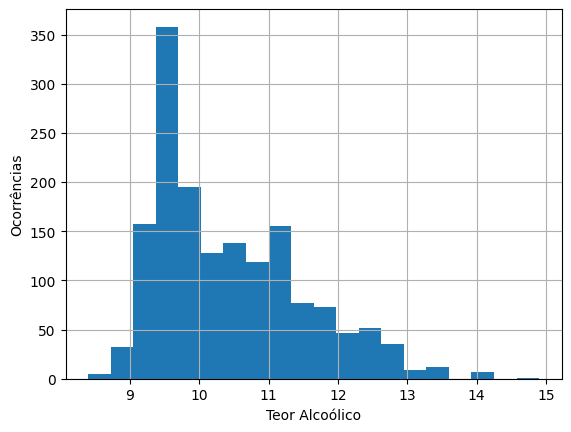

In [27]:
# Histograma da coluna 'alcohol'
df['alcohol'].hist(bins=20)
plt.xlabel('Teor Alcoólico')
plt.ylabel('Ocorrências')
plt.show()

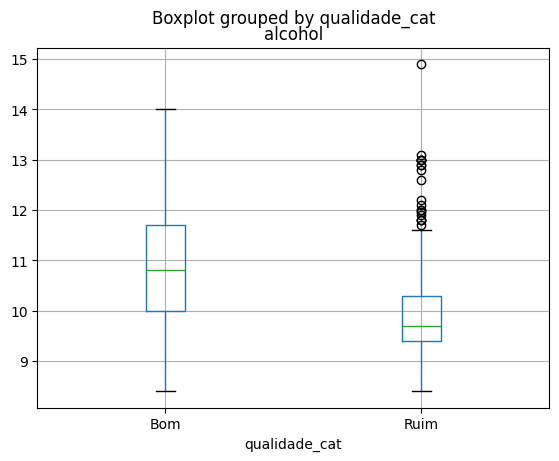

In [28]:
# Boxplot da coluna 'alcohol', agrupado por 'qualidade_cat'
df.boxplot(column='alcohol', by='qualidade_cat')
plt.show()

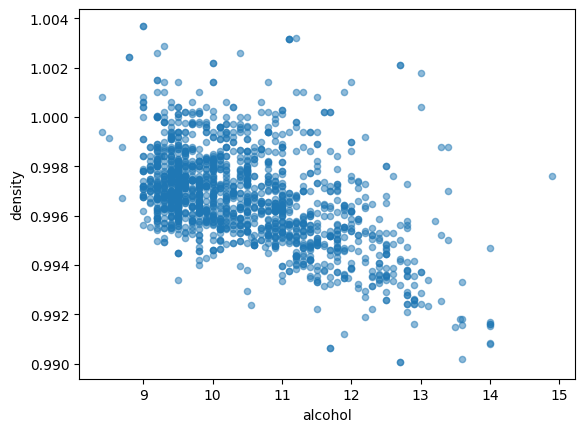

In [31]:
#Diagrama de dispersão
df.plot.scatter(x='alcohol', y='density', alpha=0.5)
plt.show()

## 8. Estatísticas descritivas

In [ ]:
# Média das colunas numéricas
df.mean(numeric_only=True)

# Correlação entre as colunas numéricas
df.corr(numeric_only=True)

df.groupby('quality_cat')['alcohol'].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,sugar_norm
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.114777
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,0.001918
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.143577
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,1.000000
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,0.055610
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,0.187049
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,0.203028
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,0.355283
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.085652
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.005527
